# Fitting with Static spectrum (Model: Voigt)
## Objective
1. Fitting with sum of voigt profile model
2. Save and Load fitting result
3. Retrieve or interpolate experimental spectrum based on fitting result and calculates its derivative up to 2.

In [1]:
# import needed module
import numpy as np
import matplotlib.pyplot as plt
import TRXASprefitpack
from TRXASprefitpack import voigt, edge_gaussian
plt.rcParams["figure.figsize"] = (12,9)

## Version information

In [2]:
print(TRXASprefitpack.__version__)

0.6.1.dev


In [3]:
# Generates fake experiment data
# Model: sum of 3 voigt profile and one gaussian edge fature

e0_1 = 8987
e0_2 = 9000
e0_edge = 8992
fwhm_G_1 = 0.8
fwhm_G_2 = 0.9
fwhm_L_1 = 3
fwhm_L_2 = 9
fwhm_edge = 7

# set scan range
e = np.linspace(8960, 9020, 160)

# generate model spectrum
model_static = 0.1*voigt(e-e0_1, fwhm_G_1, fwhm_L_1) + \
    0.7*voigt(e-e0_2, fwhm_G_2, fwhm_L_2) + \
        0.2*edge_gaussian(e-e0_edge, fwhm_edge)

# set noise level
eps = 1/1000
# generate random noise
noise_static = np.random.normal(0, eps, model_static.size)

# generate measured static spectrum
obs_static = model_static + noise_static
eps_static = eps*np.ones_like(model_static)

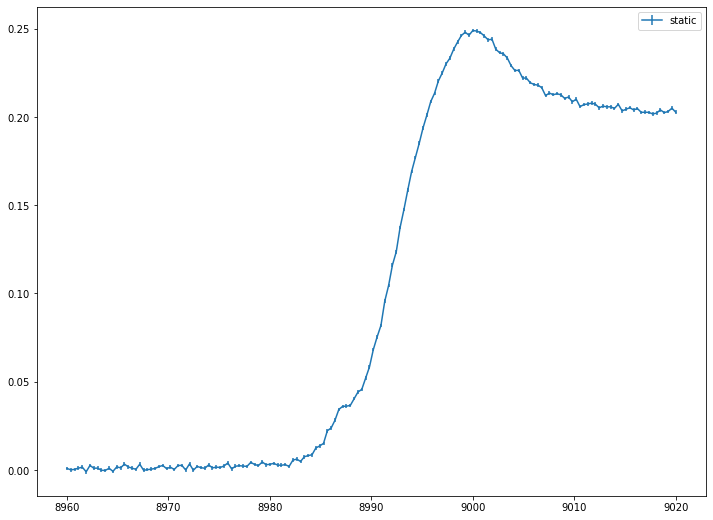

In [4]:
# plot model experimental data

plt.errorbar(e, obs_static, eps_static, label='static')
plt.legend()
plt.show()

In [6]:
# import needed module for fitting
from TRXASprefitpack import fit_static_voigt

# set initial guess 
e0_init = np.array([9000]) # initial peak position
fwhm_G_init = np.array([0]) # fwhm_G = 0 -> lorenzian
fwhm_L_init = np.array([8])

e0_edge = np.array([8995]) # initial edge position
fwhm_edge = np.array([15]) # initial edge width

fit_result_static = fit_static_voigt(e0_init, fwhm_G_init, fwhm_L_init, edge='g', edge_pos_init=e0_edge,
 edge_fwhm_init = fwhm_edge, do_glb=True, e=e, intensity=obs_static, eps=eps_static)


In [7]:
# print fitting result
print(fit_result_static)

[Model information]
    model : voigt
    edge: g
 
[Optimization Method]
    global: basinhopping
    leastsq: trf
 
[Optimization Status]
    nfev: 1607
    status: 0
    global_opt msg: requested number of basinhopping iterations completed successfully
    leastsq_opt msg: `xtol` termination condition is satisfied.
 
[Optimization Results]
    Data points: 160
    Number of effective parameters: 6
    Degree of Freedom: 154
    Chi squared:  936.8874
    Reduced chi squared:  6.0837
    AIC (Akaike Information Criterion statistic):  294.7823
    BIC (Bayesian Information Criterion statistic):  313.2333
 
[Parameters]
    e0_1:  8998.84532242 +/-  0.15766300 ( 0.00%)
    fwhm_(G, 1):  0.00000000 +/-  0.00000000 ( 0.00%)
    fwhm_(L, 1):  11.28299676 +/-  0.36419376 ( 3.23%)
    E0_(g, 1):  8992.36075317 +/-  0.08321386 ( 0.00%)
    fwhm_(G, edge, 1):  8.78726115 +/-  0.15121838 ( 1.72%)
 
[Parameter Bound]
    e0_1:  8996 <=  8998.84532242 <=  9004
    fwhm_(G, 1):  0 <=  0.00000000 

Using `static_spectrum` function in TRXASprefitpack, you can directly evaluates fitted static spectrum from fitting result

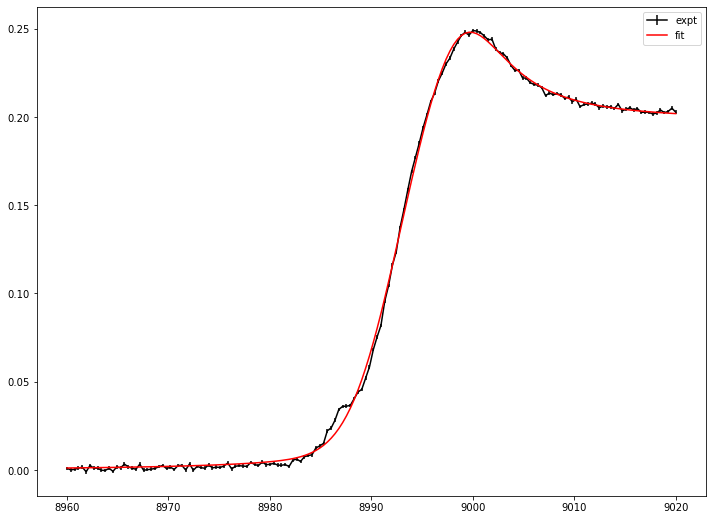

In [8]:
# plot fitting result and experimental data
from TRXASprefitpack import static_spectrum

plt.errorbar(e, obs_static, eps_static, label=f'expt', color='black')
plt.errorbar(e, static_spectrum(e, fit_result_static), label=f'fit', color='red')

plt.legend()
plt.show()

There exists one more peak near 8985 eV Region. To check this peak feature plot residual.

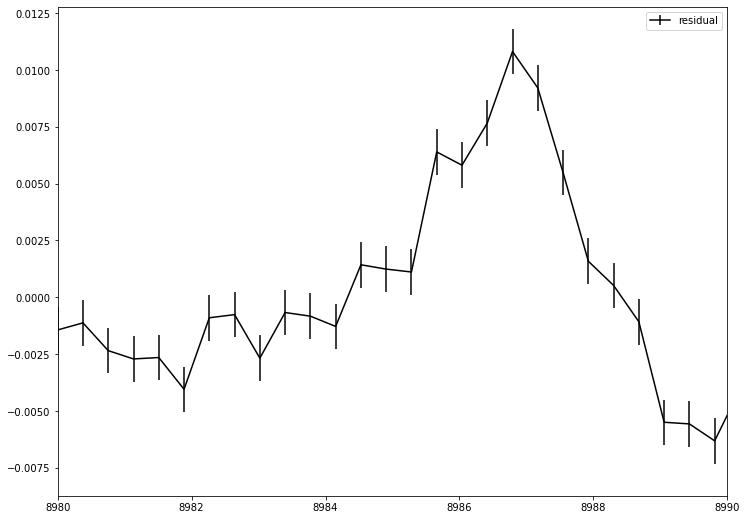

In [9]:
# plot residual

plt.errorbar(e, obs_static-static_spectrum(e, fit_result_static), eps_static, label=f'residual', color='black')

plt.legend()
plt.xlim(8980, 8990)
plt.show()


In [10]:
# try with two voigt feature 
# set initial guess from previous fitting result and
# current observation

# set initial guess 
e0_init = np.array([8987, 8999]) # initial peak position
fwhm_G_init = np.array([0, 0]) # fwhm_G = 0 -> lorenzian
fwhm_L_init = np.array([3, 11])

e0_edge = np.array([8992.3]) # initial edge position
fwhm_edge = np.array([9]) # initial edge width

fit_result_static_2 = fit_static_voigt(e0_init, fwhm_G_init, fwhm_L_init, edge='g', edge_pos_init=e0_edge,
 edge_fwhm_init = fwhm_edge, do_glb=True, e=e, intensity=obs_static, eps=eps_static)


In [11]:
# print fitting result
print(fit_result_static_2)

[Model information]
    model : voigt
    edge: g
 
[Optimization Method]
    global: basinhopping
    leastsq: trf
 
[Optimization Status]
    nfev: 2343
    status: 0
    global_opt msg: requested number of basinhopping iterations completed successfully
    leastsq_opt msg: `xtol` termination condition is satisfied.
 
[Optimization Results]
    Data points: 160
    Number of effective parameters: 9
    Degree of Freedom: 151
    Chi squared:  186.4572
    Reduced chi squared:  1.2348
    AIC (Akaike Information Criterion statistic):  42.4845
    BIC (Bayesian Information Criterion statistic):  70.161
 
[Parameters]
    e0_1:  8986.94900927 +/-  0.05893376 ( 0.00%)
    e0_2:  8999.99070278 +/-  0.05845373 ( 0.00%)
    fwhm_(G, 1):  0.00000000 +/-  0.00000000 ( 0.00%)
    fwhm_(G, 2):  0.00000000 +/-  0.00000000 ( 0.00%)
    fwhm_(L, 1):  3.12594485 +/-  0.18947878 ( 6.06%)
    fwhm_(L, 2):  9.20939873 +/-  0.20338923 ( 2.21%)
    E0_(g, 1):  8992.02644004 +/-  0.02042438 ( 0.00%)
    

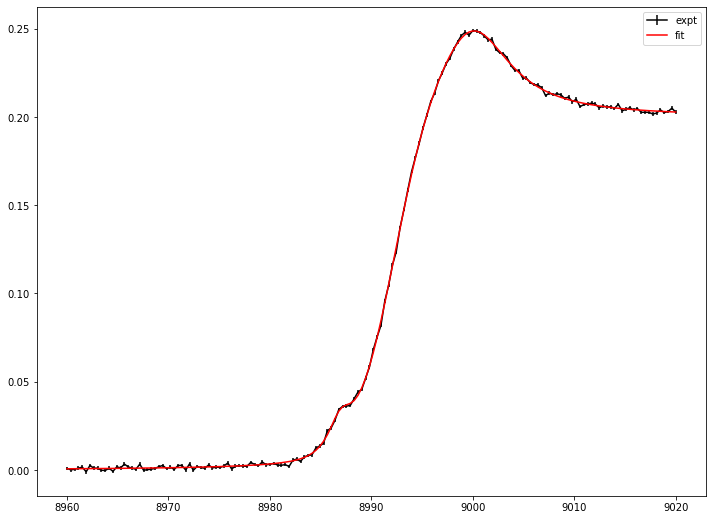

In [12]:
# plot fitting result and experimental data

plt.errorbar(e, obs_static, eps_static, label=f'expt', color='black')
plt.errorbar(e, static_spectrum(e, fit_result_static_2), label=f'fit', color='red')

plt.legend()
plt.show()



In [13]:
# save and load fitting result
from TRXASprefitpack import save_StaticResult, load_StaticResult

save_StaticResult(fit_result_static_2, 'static_example') # save fitting result to static_example.h5
loaded_result = load_StaticResult('static_example') # load fitting result from static_example.h5

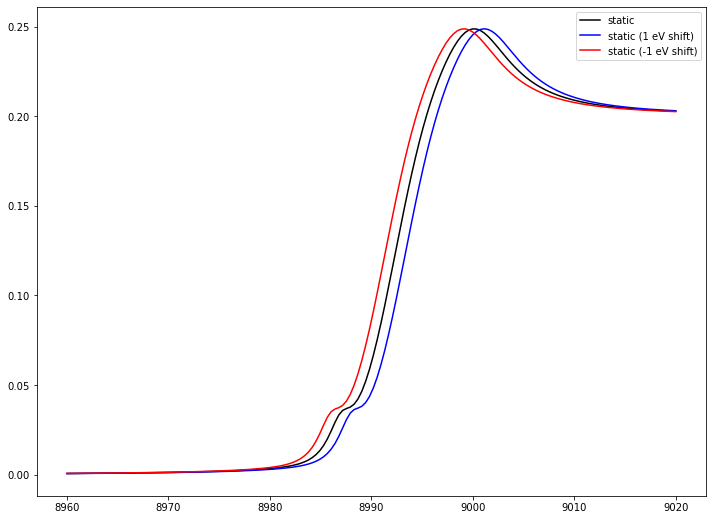

In [14]:
# plot static spectrum
plt.plot(e, static_spectrum(e, loaded_result), label='static', color='black')
plt.plot(e, static_spectrum(e-1, loaded_result), label='static (1 eV shift)', color='blue')
plt.plot(e, static_spectrum(e+1, loaded_result), label='static (-1 eV shift)', color='red')
plt.legend()
plt.show()

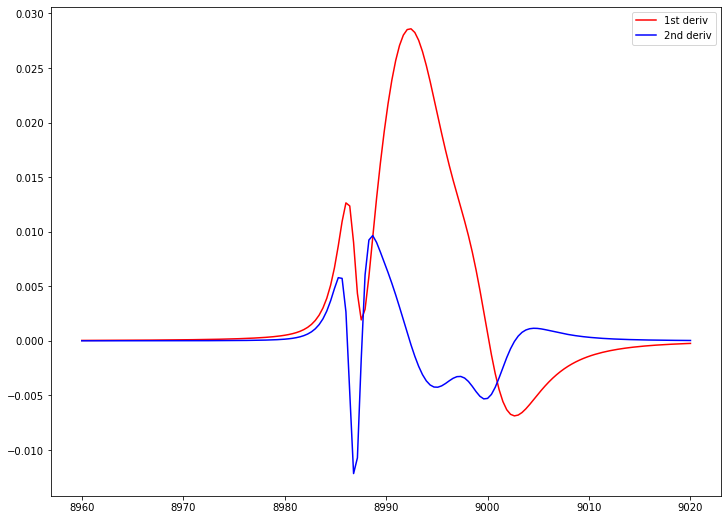

In [15]:
# plot its derivative up to second
plt.plot(e, static_spectrum(e, loaded_result, deriv_order=1), label='1st deriv', color='red')
plt.plot(e, static_spectrum(e, loaded_result, deriv_order=2), label='2nd deriv', color='blue')
plt.legend()
plt.show()

Optionally, you can calculated `F-test` based confidence interval

In [16]:
from TRXASprefitpack import confidence_interval

ci_result = confidence_interval(loaded_result, 0.05) # set significant level: 0.05 -> 95% confidence level
print(ci_result) # report confidence interval

[Report for Confidence Interval]
    Method: f
    Significance level:  5.000000e-02
 
[Confidence interval]
    8986.94900927 -  0.11707066 <= b'e0_1' <=  8986.94900927 +  0.12221374
    8999.99070278 -  0.11918347 <= b'e0_2' <=  8999.99070278 +  0.11107637
    3.12594485 -  0.35899179 <= b'fwhm_(L, 1)' <=  3.12594485 +  0.38306597
    9.20939873 -  0.38921309 <= b'fwhm_(L, 2)' <=  9.20939873 +  0.40663084
    8992.02644004 -  0.03951245 <= b'E0_(g, 1)' <=  8992.02644004 +  0.04107941
    7.01981227 -  0.16507094 <= b'fwhm_(G, edge, 1)' <=  7.01981227 +  0.17013301


In [17]:
# compare with ase
from scipy.stats import norm

factor = norm.ppf(1-0.05/2)

print('[Confidence interval (from ASE)]')
for i in range(loaded_result['param_name'].size):
    print(f"{loaded_result['x'][i] :.8f} - {factor*loaded_result['x_eps'][i] :.8f}", 
          f"<= {loaded_result['param_name'][i]} <=", f"{loaded_result['x'][i] :.8f} + {factor*loaded_result['x_eps'][i] :.8f}")

[Confidence interval (from ASE)]
8986.94900927 - 0.11550805 <= b'e0_1' <= 8986.94900927 + 0.11550805
8999.99070278 - 0.11456721 <= b'e0_2' <= 8999.99070278 + 0.11456721
0.00000000 - 0.00000000 <= b'fwhm_(G, 1)' <= 0.00000000 + 0.00000000
0.00000000 - 0.00000000 <= b'fwhm_(G, 2)' <= 0.00000000 + 0.00000000
3.12594485 - 0.37137158 <= b'fwhm_(L, 1)' <= 3.12594485 + 0.37137158
9.20939873 - 0.39863557 <= b'fwhm_(L, 2)' <= 9.20939873 + 0.39863557
8992.02644004 - 0.04003104 <= b'E0_(g, 1)' <= 8992.02644004 + 0.04003104
7.01981227 - 0.16567829 <= b'fwhm_(G, edge, 1)' <= 7.01981227 + 0.16567829


In many case, ASE does not much different from more sophisticated `f-test` based error estimation.